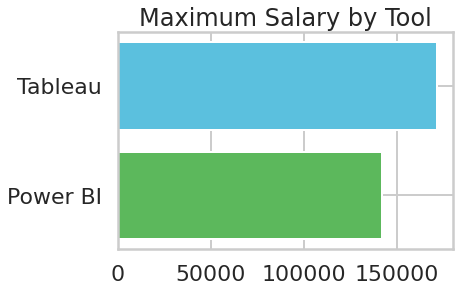

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# read the csv file into a pandas dataframe
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-a-30/hw_aa.csv", sep=';')

# filter the dataframe to only include rows where the query_string column contains "Power BI"
power_bi_df = df[df['query_string'].str.contains("Power BI")]

# filter the dataframe to only include rows where the query_string column contains "Tableau"
tableau_df = df[df['query_string'].str.contains("Tableau")]

# calculate the average salary for Power BI
power_bi_avg_salary = power_bi_df['salary_to'].mean()

# calculate the average salary for Tableau
tableau_avg_salary = tableau_df['salary_to'].mean()
# create a bar chart comparing the average salaries
tools = ['Power BI', 'Tableau']
avg_salaries = [power_bi_avg_salary, tableau_avg_salary]

import seaborn as sns

# set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("poster")

# create a horizontal bar chart
plt.barh(tools, avg_salaries, color=["#5cb85c", "#5bc0de"])
plt.xlabel('')
plt.ylabel('')
plt.title('Maximum Salary by Tool')

plt.show()

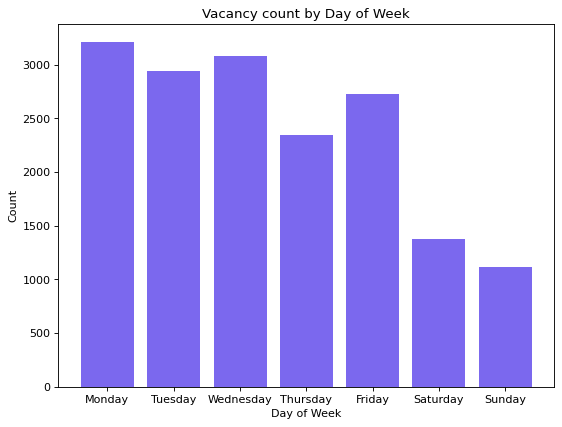

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

# read the csv file into a pandas dataframe
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-a-30/hw_aa.csv", sep=';')

# convert the 'published_at' column to datetime
df['published_at'] = pd.to_datetime(df['published_at'])

# extract the day of the week from the 'published_at' column and store it in a new column called 'day_of_week'
df['day_of_week'] = df['published_at'].dt.dayofweek

# group the dataframe by 'day_of_week' and count the number of rows in each group
day_of_week_counts = df.groupby('day_of_week').size().reset_index(name='counts')

# Create a list of days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Replace the day of the week numbers with their corresponding names
day_of_week_counts['day_of_week'] = day_of_week_counts['day_of_week'].apply(lambda x: days_of_week[x])

# create a bar chart of the counts
plt.bar(day_of_week_counts['day_of_week'], day_of_week_counts['counts'], color = '#7B68EE')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Vacancy count by Day of Week')
plt.show()




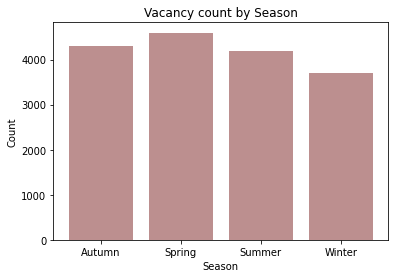

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# read the csv file into a pandas dataframe
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-a-30/hw_aa.csv", sep=';')

# convert the 'published_at' column to datetime
df['published_at'] = pd.to_datetime(df['published_at'])

# Extract the month from the 'published_at' column
df['month'] = df['published_at'].dt.month

# Create a new column 'season' based on the month
df['season'] = 'Summer'
df.loc[df['month'].isin([9,10,11]), 'season'] = 'Autumn'
df.loc[df['month'].isin([12,1,2]), 'season'] = 'Winter'
df.loc[df['month'].isin([3,4,5]), 'season'] = 'Spring'

# group the dataframe by 'season' and count the number of rows in each group
season_counts = df.groupby('season').size().reset_index(name='counts')

# create a bar chart of the counts
plt.bar(season_counts['season'], season_counts['counts'], color = '#BC8F8F')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Vacancy count by Season')
plt.show()


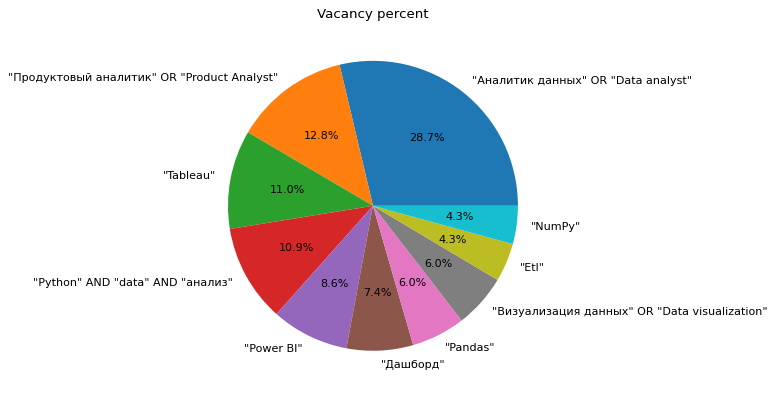

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

# read the csv file into a pandas dataframe
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-a-30/hw_aa.csv", sep=';')

# group the dataframe by 'query_string' and count the number of rows in each group
query_string_counts = df.groupby('query_string').size().reset_index(name='counts')

# sort the dataframe by 'counts' in descending order
query_string_counts = query_string_counts.sort_values(by='counts', ascending=False)

# take the top 10 query strings
top_10_query_strings = query_string_counts.head(10)

plt.pie(top_10_query_strings['counts'], labels=top_10_query_strings['query_string'],autopct='%1.1f%%')
plt.title('Vacancy percent')
plt.show()




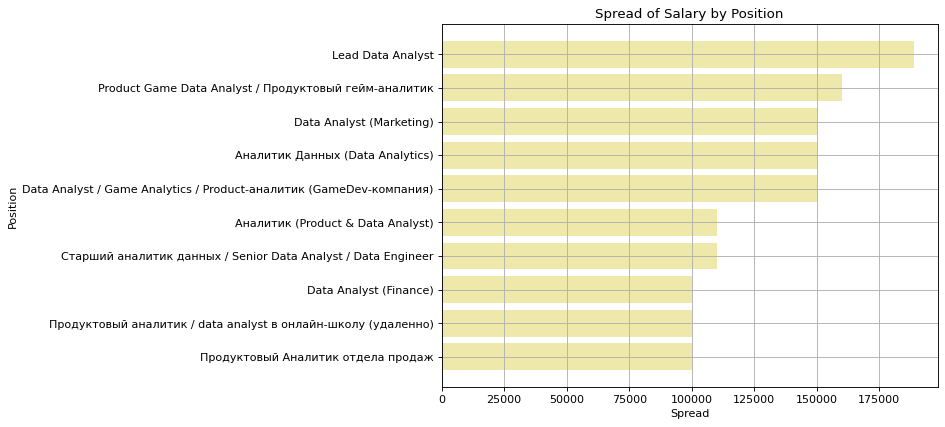

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)


# read the csv file into a pandas dataframe
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-a-30/hw_aa.csv", sep=';')

# create a new column 'spread' that calculates the spread of the salary range
df['spread'] = df['salary_to'] - df['salary_from']

# group the dataframe by 'name' and take the mean of the 'spread' column
spread_mean = df.groupby('name')['spread'].mean().reset_index()

# sort the dataframe by 'spread' in descending order
spread_mean = spread_mean.sort_values(by='spread', ascending=False)

# take the top 10 positions with the largest spread
top_10_spread = spread_mean.head(10)

# create a horizontal bar chart of the spread
plt.barh(top_10_spread['name'], top_10_spread['spread'], color = '#EEE8AA')
plt.xlabel('Spread')
plt.ylabel('Position')
plt.title('Spread of Salary by Position')
plt.gca().invert_yaxis()
plt.grid()
plt.show()
